In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

In [7]:
df =pd.read_csv("C:/Users/VIBIN/Desktop/practice/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5,1,'Histogram of BMI')

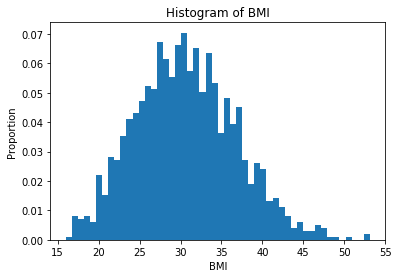

In [9]:
df.bmi.plot.hist(bins = 50, normed = True)
plt.xlabel("BMI")
plt.ylabel("Proportion")
plt.title("Histogram of BMI")

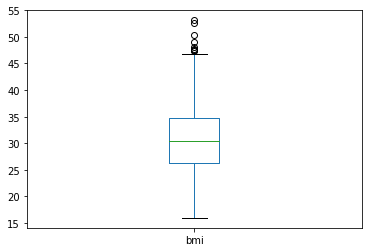

In [10]:
df.bmi.plot.box()

In [11]:
q1 ,q2,q3 = np.percentile(df.bmi,[25,50,75])
q1,q2,q3

(26.29625, 30.4, 34.69375)

In [12]:
iqr = q3 - q1
iqr #INTER QUARTILE RANGE

8.3975

In [13]:
upper_whisk = np.min([np.max(df.bmi),q3 + 1.5*iqr])
lower_whisk = np.min([np.max(df.bmi),q1 - 1.5*iqr])
upper_whisk,lower_whisk

(47.290000000000006, 13.7)

In [14]:
outliers = np.where((df.bmi > upper_whisk)| (df.bmi < lower_whisk),1,0)

In [15]:
pd.Series(outliers).value_counts()

0    1329
1       9
dtype: int64

In [16]:
df[outliers==1].head()

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520


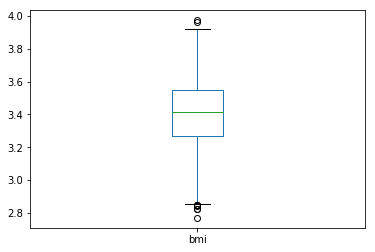

In [17]:
np.log(df.bmi).plot.box()

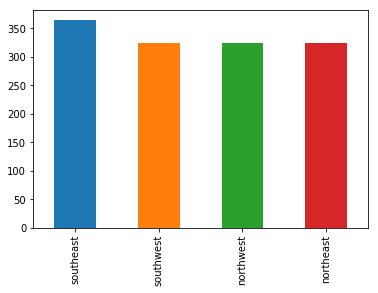

In [18]:
df.region.value_counts().plot.bar()

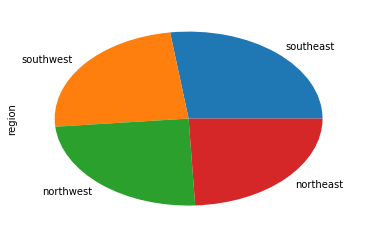

In [19]:
df.region.value_counts().plot.pie()

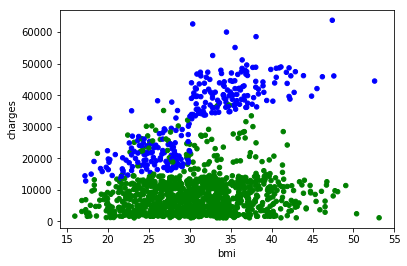

In [20]:
colors = np.where(df.smoker =='yes','blue','green')
df.plot.scatter("bmi","charges",color = colors)


In [21]:
agg = df.groupby(["region","sex"]).charges.median().unstack()
agg

sex,female,male
region,,
northeast,10197.7722,9957.72160
northwest,9614.0729,8413.46305
southeast,8582.3023,9504.31030
southwest,8530.8370,9391.34600


In [22]:
sns.heatmap(agg, annot=True, cmap=sns.color_palete("Blues"))

AttributeError: module 'seaborn' has no attribute 'color_palete'